# Pointers, Structs, Slices, and Maps

## Pointers
- A pointer holds the memory address of a value.
- *T is the type of the pointer variable whose value is the address of a T value.
- The zero value of a pointer is nil.
- The & operator generates a pointer to its operand.
- The * operator denotes the pointer's underlying value. (dereferencing) / (indirecting)

In [9]:
import "fmt"

var p *int // declare a pointer to an int

i:= 42
p = &i // point to i

fmt.Println(p) // address of i
fmt.Println(*p) // read i through the pointer (dereference)

*p = 21 // set i through the pointer
fmt.Println(i) // see the new value of i
fmt.Println(*p) 

0x140000d2000
42
21
21


3 <nil>

- Unlike C, Go has no pointer arithmetic.
- Pointer arithmetic refers to the ability to perform arithmetic operations on pointers, which are variables that store memory addresses.
- Reasons not to implement in go: Simplicity, Safety, Garbage collection

## Structs
- A struct is a collection of fields.

In [1]:
import "fmt"
type Vertex struct {
    X int
    Y int
}

fmt.Println(Vertex{1,2})

{1 2}


6 <nil>

In [2]:
// updating struct fields
v := Vertex{1, 2}
v.X = 4
fmt.Println(v)

{4 2}


6 <nil>

In [3]:
// pointer to struct
p := &v
p.X = 19
fmt.Println(p)
fmt.Println(v)

&{19 2}
{19 2}


7 <nil>

In [14]:
// struct literals
var (
	v1 = Vertex{1, 2}  // has type Vertex
	v2 = Vertex{X: 1}  // Y:0 is implicit and X value is 1
	v3 = Vertex{}      // X:0 and Y:0
	p  = &Vertex{1, 2} // has type *Vertex
)
fmt.Println(v1, v2, v3, p, p.X)

{1 2} {1 0} {0 0} &{1 2} 1


27 <nil>

## Arrays
The type [n]T is an array of n values of type T
- length of arrays is fixed

In [6]:
var a [2]string // initialize an array of 2 strings
a[0] = "Hello"
a[1] = "World"
fmt.Println(a[0], a[1])
fmt.Println(a)

primes := [6]int{2, 3, 5, 7, 11, 13} // declare and initialize
fmt.Println(primes)

Hello World
[Hello World]
[2 3 5 7 11 13]


16 <nil>

## Slices
The type []T is a slice with elements of type T.
- length of slices is dynamic, unlike arrays
- It has flexible views into the elements of an array.
- More used than arrays in Go
- A slice is formed by specifying two indices, a low and high bound, separated by a colon: `a[low : high]`
- Ex: a[1:4] is a slice of the array a from index 1 to 3, inclusive. i.e takes the first index one but not the last one

In [8]:
primes := [6]int{2, 3, 5, 7, 11, 13}
var s []int = primes[1:4] // slice of primes from 1 to 4 index
fmt.Println(s)

[3 5 7]


8 <nil>

Slices are like references to arrays
- A slice does not store any data, it just describes a section of an underlying array.
- So if we change a value in a slice, it will change the value in the underlying array.
- Also other slices that share the same underlying array will see those changes.

In [13]:
arr := [...]int{1,2,3,4,5} // ... means compiler figures out the length of the array according to the elements
var slice []int = arr[1:4] // slice of arr from 1 to 4 index
fmt.Println(slice)
slice[0] = 10
fmt.Println(slice, arr) // slice and array both are changed

[2 3 4]
[10 3 4] [1 10 3 4 5]


22 <nil>

Slice literals
- A slice literal is like an array literal without the length.
- Ex: []bool{true, true, false}

In [24]:
q := []int{2, 3, 5, 7, 11, 13}
// when we do literal, the underlying array is created automatically and the slice references it
fmt.Println(q)

[2 3 5 7 11 13]


16 <nil>

In [16]:
s := []struct {
	i int
	b bool
}{
	{2, true},
	{3, false},
	{5, true},
	{7, true},
	{11, false},
	{13, true},
}
fmt.Println(s)

[{2 true} {3 false} {5 true} {7 true} {11 false} {13 true}]


60 <nil>

Slice defaults
- When slicing, you may omit the high or low bounds to use their defaults instead.
- The default is zero for the low bound and the length of the slice for the high bound.
- similar to python list slicing

For array of length 10 all of the following are same:
- a[0:10] 
- a[:10]
- a[0:]
- a[:]


In [17]:
s := []int{2, 3, 5, 7, 11, 13}
s = s[1:4]
fmt.Println(s)
s = s[:2]
fmt.Println(s)
s = s[1:]
fmt.Println(s)

[3 5 7]
[3 5]
[5]


4 <nil>

Slices has length and capacity
- The length of a slice is the number of elements it contains.
- The capacity of a slice is the number of elements in the underlying array, counting from the first element in the slice.
- accessing: len(s) and cap(s)

In [61]:
func printSlice(s []int) {
	fmt.Printf("len=%d cap=%d %v\n", len(s), cap(s), s)
}

arr := [6]int{1,2,3,4,5,6}
var s []int = arr[:]
printSlice(s)

// Slice the slice to give it zero length.
s = s[:0]
printSlice(s)
// but the capacity remains the same

// Extend its length.
s = s[:4]
printSlice(s)
// again the capacity remains the same

// Drop its first two values.
s = s[2:]
printSlice(s)
// dropping initial values decrements length as well as capacity
// so here we are dropping 2 initial values then length-2 and capacity-2

// s = s[2:] // again dropping 2 initial values, length-2 and capacity-2
// printSlice(s) , this is commented as it will make length 0 and the next line will give error as slice bounds out of range

s = s[2:4] // dropping 2 initial values and then taking 2 values from the remaining (underlying array)
printSlice(s) // so when dropped capacity-2 and length-2 but after that we are also expanding so length+2 and capacity unchanged

s = s[2:]
printSlice(s) // length = 0 and capacity = 0, as all the values are dropped

fmt.Println(arr)

// in every single above cases the underlying array is not affected

len=6 cap=6 [1 2 3 4 5 6]
len=0 cap=6 []
len=4 cap=6 [1 2 3 4]
len=2 cap=4 [3 4]
len=2 cap=2 [5 6]
len=0 cap=0 []
[1 2 3 4 5 6]


14 <nil>

In [56]:
s := []int{2, 3, 5, 7, 11, 13}
printSlice(s)
s = s[:0]
printSlice(s)
s = s[:5]
printSlice(s)
s = s[2:]
printSlice(s)
s = s[:4]
printSlice(s)
// slices can be expanded as long as it is within the capacity
// here we cant expand s beyond 4 as the capacity is 4
// s = s[:5] // slice bounds out of range
// printSlice(s)

len=6 cap=6 [2 3 5 7 11 13]
len=0 cap=6 []
len=5 cap=6 [2 3 5 7 11]
len=3 cap=4 [5 7 11]
len=4 cap=4 [5 7 11 13]


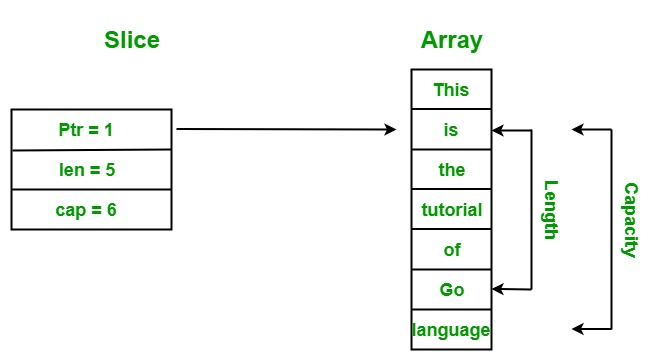

In [58]:
// code for above

 // Creating an array
 arr := [7]string{"This", "is", "the", "tutorial",
 "of", "Go", "language"}

// Display array
fmt.Println("Array:", arr)

// Creating a slice
myslice := arr[1:6] // so here 1 is the pointer to the underlying array

// Display slice
fmt.Println("Slice:", myslice)
// Display length of the slice
fmt.Printf("Length of the slice: %d", len(myslice))
// Display the capacity of the slice
fmt.Printf("\nCapacity of the slice: %d", cap(myslice))

Array: [This is the tutorial of Go language]
Slice: [is the tutorial of Go]
Length of the slice: 5
Capacity of the slice: 6

25 <nil>

Nil slices
- The zero value of a slice is nil.

In [59]:
var s []int
	fmt.Println(s, len(s), cap(s))
	if s == nil {
		fmt.Println("nil!")
	}

[] 0 0
nil!


In [65]:
s := []int{2, 3, 5, 7, 11, 13}
s = s[6:]
printSlice(s)
if s == nil {
	fmt.Println("nil!")
}
// not nil as the slice is pointing to the underlying array and it is not at its zero value i.e. nil

len=0 cap=0 []


make
- Slices can be created with the built-in make function; this is how you create dynamically-sized arrays.
- The make function allocates a zeroed array and returns a slice that refers to that array

In [68]:
func printSlice(s string, x []int) {
	fmt.Printf("%s len=%d cap=%d %v\n",
		s, len(x), cap(x), x)
}

a := make([]int, 5) // len(a)=5
	printSlice("a", a)

	b := make([]int, 0, 5) // len(b)=0, cap(b)=5
	printSlice("b", b)

	c := b[:2]
	printSlice("c", c)

	d := c[2:5] // dropping initial 2 values, i.e. moving pointer to 2 and then taking 3 values from the remaining
	printSlice("d", d)

a len=5 cap=5 [0 0 0 0 0]
b len=0 cap=5 []
c len=2 cap=5 [0 0]
d len=3 cap=3 [0 0 0]


Slice of slices
- Slices can contain any type, including other slices.

In [81]:
// 2 slices in 1 slice
two := [][]int {[]int {1,2,3}, []int {4,5,6}}
fmt.Println(two)
printSlice("first", two[0])
printSlice("second", two[1])

fmt.Println(two[0][1]) // second element of first slice

two[1][1] = 10 // changing the value of second element of second slice
fmt.Println(two)

[[1 2 3] [4 5 6]]
first len=3 cap=3 [1 2 3]
second len=3 cap=3 [4 5 6]
2
[[1 2 3] [4 10 6]]


19 <nil>

Appending to a slice
- append function can be used to append one or more values to the end of a slice. `func append(s []T, vs ...T) []T`
- The first parameter s of append is a slice of type T, and the rest are T values to append to the slice.
- append returns a slice containing original slice plus the provided values.
- If the backing (underlying) array of s is too small to fit all the given values a bigger array will be allocated automatically. The returned slice will point to the newly allocated array.

In [83]:
func printSlice(s []int) {
	fmt.Printf("len=%d cap=%d %v\n", len(s), cap(s), s)
}

var s []int
	printSlice(s)

	// append works on nil slices.
	s = append(s, 0)
	printSlice(s) // length and capacity both increased

	// The slice grows as needed.
	s = append(s, 1)
	printSlice(s)

	// We can add more than one element at a time.
	s = append(s, 2, 3,4,5,6)
	printSlice(s) // here len=7 and cap=8, is because new array got allocated with capacity 8 and the old array got garbage collected
	// the capacity of new array is decided by the compiler, on the basis of the length of the slice

len=0 cap=0 []
len=1 cap=1 [0]
len=2 cap=2 [0 1]
len=7 cap=8 [0 1 2 3 4 5 6]


## Range
- A form of for loop to iterate over a slice or map.
- It returns two values: index and copy of the element at that index.

In [84]:
s:= []int{1,2,3,4,5}

for i,v := range s {
	fmt.Println(i,v)
}

0 1
1 2
2 3
3 4
4 5


In [86]:
// range can also be used for arrays
arr := [5]int{1,2,3,4,5}

for i,v := range arr {
	fmt.Println(i,v)
}

0 1
1 2
2 3
3 4
4 5


In [87]:
// skipping index
for _,v := range arr {
	fmt.Println(v)
}

1
2
3
4
5


In [90]:
// skipping value
// for i,_ := range arr { // works the same as below line
for i := range arr {
	fmt.Println(i)
}

0
1
2
3
4


## Maps
- Maps keys to values.
- The zero value of a map is nil. A nil map has no keys, nor can keys be added.


In [101]:
// initializing a map
var m map[string]int
fmt.Println(m)

ages := map[string]int{ // map literal
	"Alice": 30,
	"Bob":   25,
	"John":  35,
}

fmt.Println(ages)
fmt.Println(ages["Alice"]) // 30 true (true means the key is present in the map)
alice := ages["Alice"]
fmt.Println(alice) // 30

ages["Bob"] = 46 // updating the value
fmt.Println(ages)

map[]
map[Alice:30 Bob:25 John:35]
30 true
30
map[Alice:30 Bob:46 John:35]


29 <nil>

In [103]:
type Vertex struct {
	Lat, Long float64
}

var m = map[string]Vertex{
	// "Bell Labs": Vertex{ // in this map literal we can skip the type name Vertex here as it is already mentioned in the map declaration
	// 	40.68433, -74.39967,
	// },
	// "Google": Vertex{
	// 	37.42202, -122.08408,
	// },
	"Bell Labs": {40.68433, -74.39967},
	"Google":    {37.42202, -122.08408},
}

fmt.Println(m)

map[Bell Labs:{40.68433 -74.39967} Google:{37.42202 -122.08408}]


65 <nil>

The make function returns a map of the given type, initialized and ready for use.

In [99]:
newAges := make(map[string]int)
fmt.Println(newAges)

map[]


6 <nil>

mutating maps


In [110]:
m := make(map[string]int)
m["Answer"] = 42 // adding a key-value pair
m["Question"] = 10
fmt.Println(m)

// updating
m["Answer"] = 60
fmt.Println(m)

// deleting
delete(m, "Answer")
fmt.Println(m)

// checking if the key is present
v , ok := m["Answer"]
v1 , ok1 := m["Question"]
fmt.Println(v, ok)
fmt.Println(v1, ok1)

// If key is not in the map, then elem is the zero value for the map's element type.

map[Answer:42 Question:10]
map[Answer:60 Question:10]
map[Question:10]
0 false
10 true


8 <nil>

## Function values
- Functions are values too. They can be passed around just like other values.
- Function values may be used as function arguments and return values.

In [114]:
// Function that takes two integers and a function as arguments
func calculate(a, b int, operation func(int, int) int) int {
	return operation(a, b)
}

// Example functions that can be used with calculate
func add(a, b int) int {
	return a + b
}

func subtract(a, b int) int {
	return a - b
}

// Passing the add function to calculate
result := calculate(10, 5, add) // result stores the value of calculate function with provided arguments
fmt.Println("Result of addition:", result) 

// Passing the subtract function to calculate
result = calculate(10, 5, subtract)
fmt.Println("Result of subtraction:", result)

Result of addition: 15
Result of subtraction: 5


25 <nil>

## Function closures
- Go functions may be closures. A closure is a function value that references variables from outside its body. The function may access and assign to the referenced variables; in this sense the function is "bound" to the variables.
- In the following example makeCounter function returns a closure. Each closure is bound to its own count variable.

In [116]:
// The returned function keeps track of a count and increments it on each call.
func makeCounter() func() int {
	count := 0

	// This is the closure function that captures the 'count' variable
	// from its surrounding scope.
	return func() int {
		count++
		return count
	}
}

counter := makeCounter()
fmt.Println(counter()) // 1
fmt.Println(counter()) // 2
fmt.Println(counter()) // 3

fmt.Println("Counter 2")
counter2 := makeCounter()
fmt.Println(counter2()) // 1 "count" variable is different for counter2
fmt.Println(counter2()) // 2
fmt.Println(counter2()) // 3

1
2
3
Counter 2
1
2
3


2 <nil>

Implement a fibonacci function that returns a function (a closure) that returns successive fibonacci numbers (0, 1, 1, 2, 3, 5, ...).

In [117]:
func fibonacci() func() int {
	a, b := 0, 1
	return func() int {
		result := a
		a, b = b, a+b
		return result
	}
}

f := fibonacci()
	for i := 0; i < 10; i++ {
		fmt.Println(f())
	}

0
1
1
2
3
5
8
13
21
34
